## About Dataset

There are 14 attributes in each case of the dataset. They are:
*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil-teacher ratio by town

*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's


## Import Library

In [1]:
# import library
import matplotlib.pyplot as plt
import keras
import numpy as np

from pandas import read_csv
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers

## Preprocessing

In [2]:
kolom = [
'CRIM',
'ZN',
'INDUS',
'CHAS',
'NOX',
'RM',
'AGE',
'DIS',
'RAD',
'TAX',
'PTRATIO',
'B',
'LSTAT',
'MEDV'
]

In [3]:
# load dataset
dataframe = read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data", delim_whitespace=True, header=None)
dataframe.columns = kolom
dataset = dataframe.values

In [4]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

## Modeling

In [7]:
network = models.Sequential()
network.add(layers.Dense(24, activation='relu', input_shape=(13,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [8]:
# evaluate model
network.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [9]:
history = network.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
7/7 [==============================] - 1s 85ms/step - loss: 452.0872 - mae: 17.2600 - val_loss: 224.7837 - val_mae: 12.5727
Epoch 2/150
7/7 [==============================] - 0s 14ms/step - loss: 179.7714 - mae: 11.2480 - val_loss: 134.1446 - val_mae: 9.3281
Epoch 3/150
7/7 [==============================] - 0s 13ms/step - loss: 132.2333 - mae: 9.0881 - val_loss: 115.9085 - val_mae: 8.2814
Epoch 4/150
7/7 [==============================] - 0s 13ms/step - loss: 99.0825 - mae: 7.7681 - val_loss: 91.3259 - val_mae: 7.4327
Epoch 5/150
7/7 [==============================] - 0s 13ms/step - loss: 93.3391 - mae: 7.6865 - val_loss: 87.3311 - val_mae: 6.7288
Epoch 6/150
7/7 [==============================] - 0s 13ms/step - loss: 88.2652 - mae: 7.0409 - val_loss: 78.4569 - val_mae: 6.5106
Epoch 7/150
7/7 [==============================] - 0s 13ms/step - loss: 80.0496 - mae: 6.9400 - val_loss: 87.5488 - val_mae: 7.2997
Epoch 8/150
7/7 [==============================] - 0s 15ms/step - l

## Evaluate Model

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


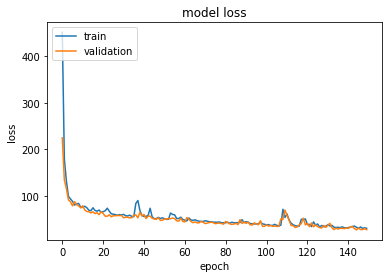

In [10]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Predict New Data

In [11]:
Xnew = np.array([[0.006, 25, 5, 0, 1.5, 6.5, 70, 5, 1, 200, 15.3, 396.9, 5]])

ynew = network.predict(Xnew)
print("X=%s \n Predicted=%s" % (Xnew[0], ynew[0]))

X=[6.000e-03 2.500e+01 5.000e+00 0.000e+00 1.500e+00 6.500e+00 7.000e+01
 5.000e+00 1.000e+00 2.000e+02 1.530e+01 3.969e+02 5.000e+00] 
 Predicted=[35.71071]
